<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_07/01_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression


In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/datasets/master/iris.csv')

df

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


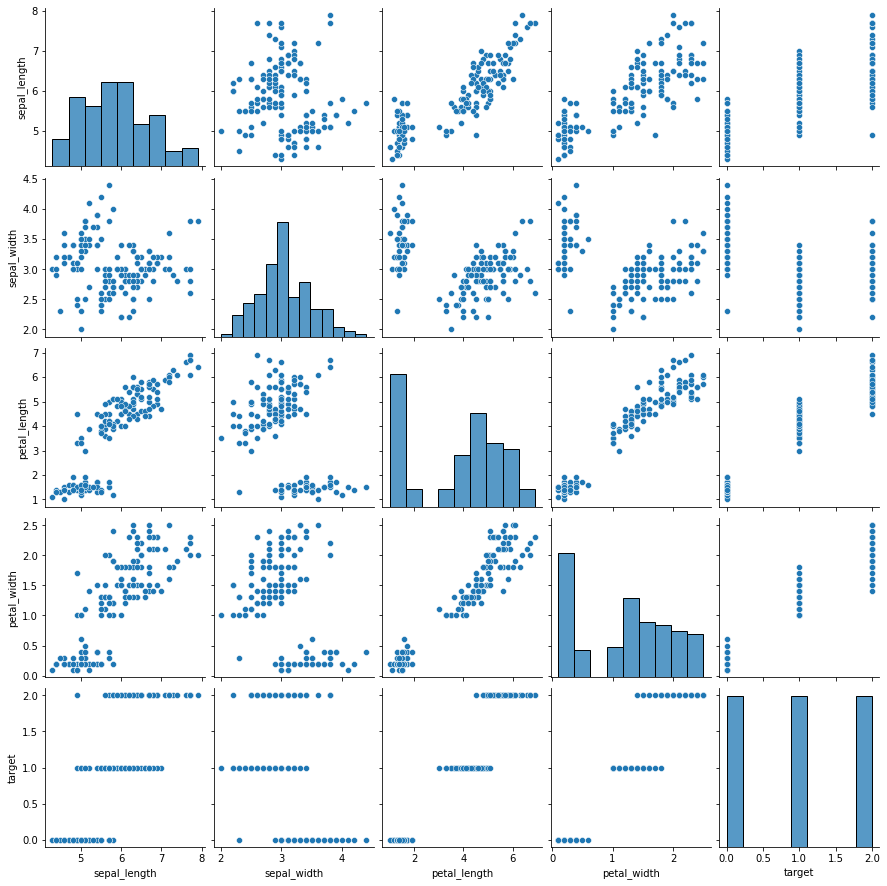

In [ ]:
import seaborn as sns

sns.pairplot(df)

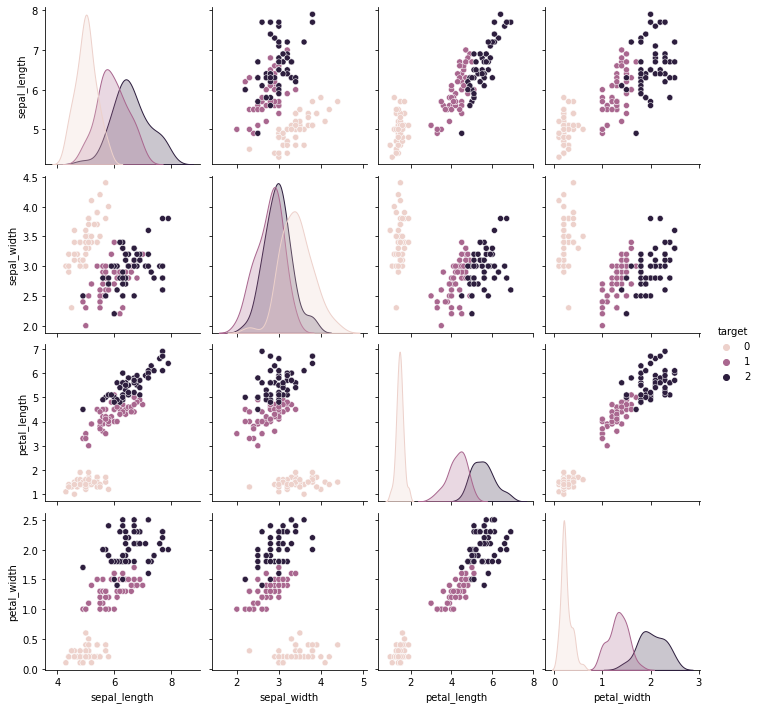

In [ ]:
sns.pairplot(df, hue='target')

https://stackoverflow.com/a/50703596/11074111

In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


In [ ]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


In [ ]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [ ]:
df.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [ ]:
# df['species'].astype(str).astype(int)

In [ ]:
pd.to_numeric(df['species'],errors='coerce')

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
145   NaN
146   NaN
147   NaN
148   NaN
149   NaN
Name: species, Length: 150, dtype: float64

In [ ]:
df['species'].map({'virginica': 0, 'setosa': 1, 'versicolor': 2}).astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: species, Length: 150, dtype: int64

In [ ]:
df['species'].map({'virginica': 2, 'setosa': 0, 'versicolor': 1})

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [ ]:
df['species'] = df['species'].map({'virginica': 2, 'setosa': 0, 'versicolor': 1})

df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [ ]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width,species,target
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000,1.000000
target,0.782561,-0.419446,0.949043,0.956464,1.000000,1.000000


#### Data Prep

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'target'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
X_train.tail(2)

,sepal_length,sepal_width,petal_length,petal_width
147,6.5,3.0,5.2,2.0
110,6.5,3.2,5.1,2.0


In [ ]:
y_test.tail(2)

39    0
61    1
Name: target, dtype: int64

#### Make Model

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.predict(X_test)

array([2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0,
       0, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0,
       1])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, lr.predict(X_test))

1.0

In [ ]:
lr.predict(X_test)

array([2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0,
       0, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0,
       1])

In [ ]:
confusion_matrix(y_test, lr.predict(X_test))

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]])

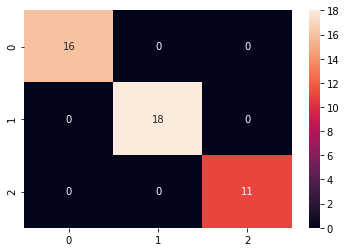

In [ ]:
from sklearn.metrics import confusion_matrix

preds = lr.predict(X_test)

sns.heatmap(confusion_matrix(y_test, preds), annot=True)

### Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=10000)

In [ ]:
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgdc.predict(X_test)

array([2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0,
       0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0,
       0])

In [ ]:
preds = sgdc.predict(X_test)

accuracy_score(y_test, preds)

0.9111111111111111

#### Grid Serach
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.model_selection import GridSearchCV

param_dict = {'loss': ['log', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'max_iter': [10, 100, 250, 1000, 10000]}

sgdc = SGDClassifier()

grid = GridSearchCV(sgdc, param_dict)

In [ ]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'loss': ['log', 'huber', 'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'max_iter': [10, 100, 250, 1000, 10000]},


https://stackoverflow.com/a/52828900/11074111

In [ ]:
grid.best_params_

{'loss': 'log', 'max_iter': 250}

In [ ]:
sgdc = SGDClassifier(loss='log', max_iter=250)

In [ ]:
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=250,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
preds = sgdc.predict(X_test)

accuracy_score(y_test, preds)

0.6